# 1 - 25 grads polynomiær regresjon - to variable

In [1]:
import numpy as np
import os
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

# Make data set
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

x_mesh, y_mesh = np.meshgrid(x, y)
z = f(x_mesh, y_mesh)

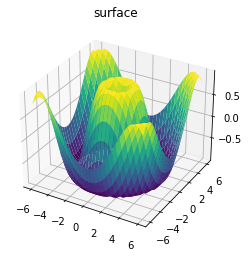

In [4]:
ax = plt.axes(projection='3d')
ax.plot_surface(x_mesh, y_mesh, z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

C:\Users\Bjorn\AppData\Local\Temp\ipykernel_3924\1843701536.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(32,10))


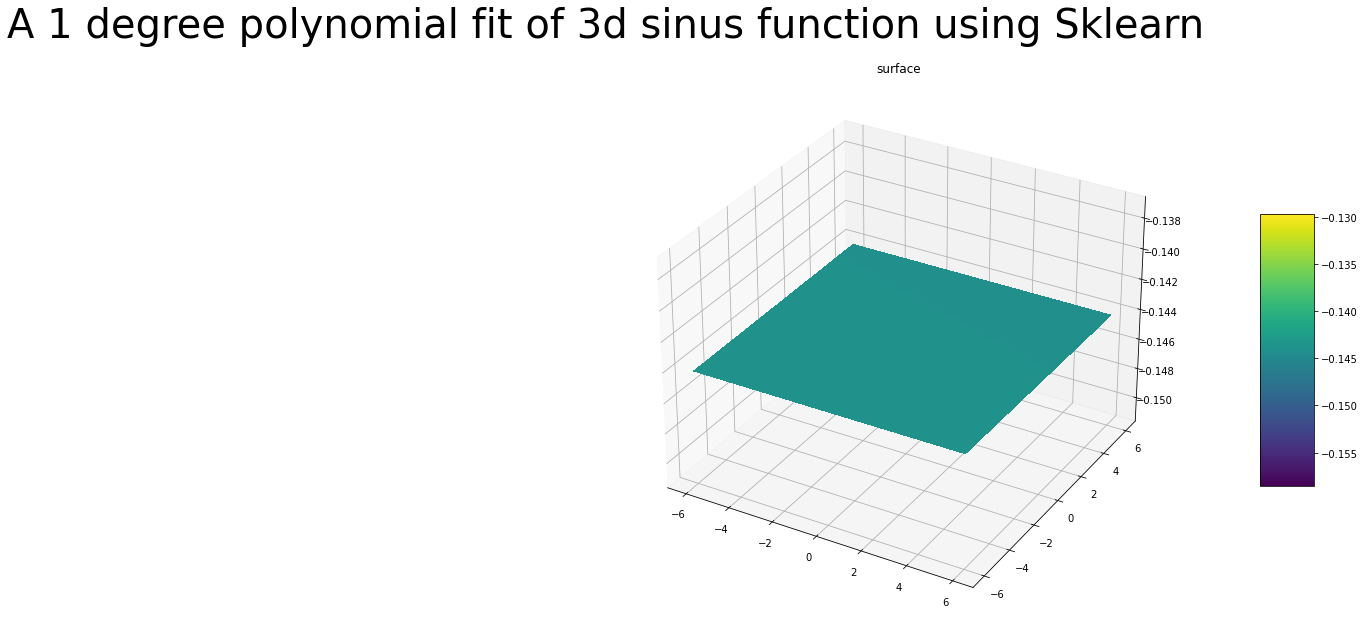

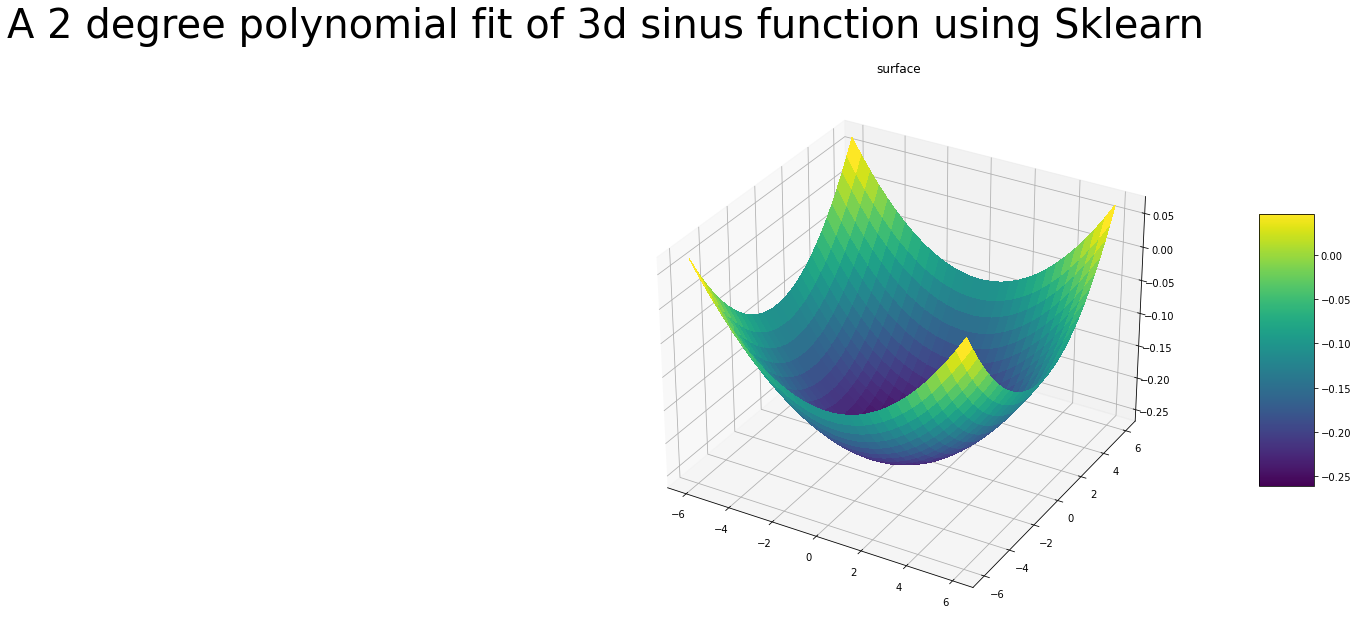

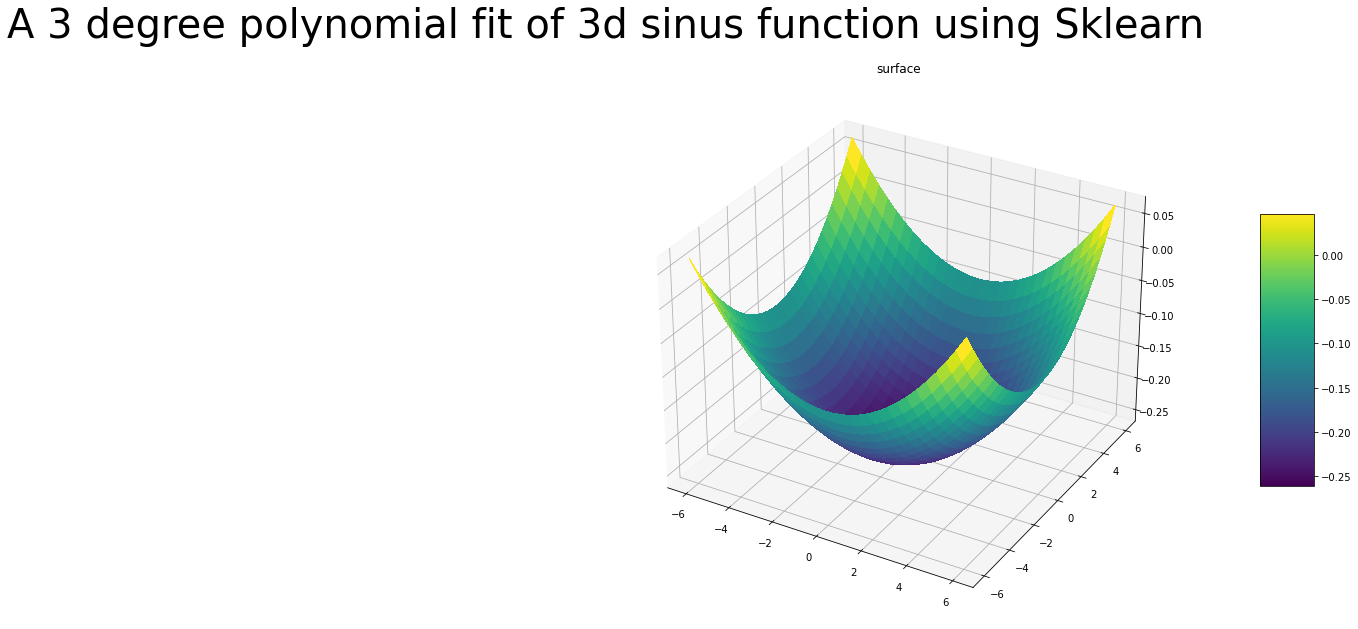

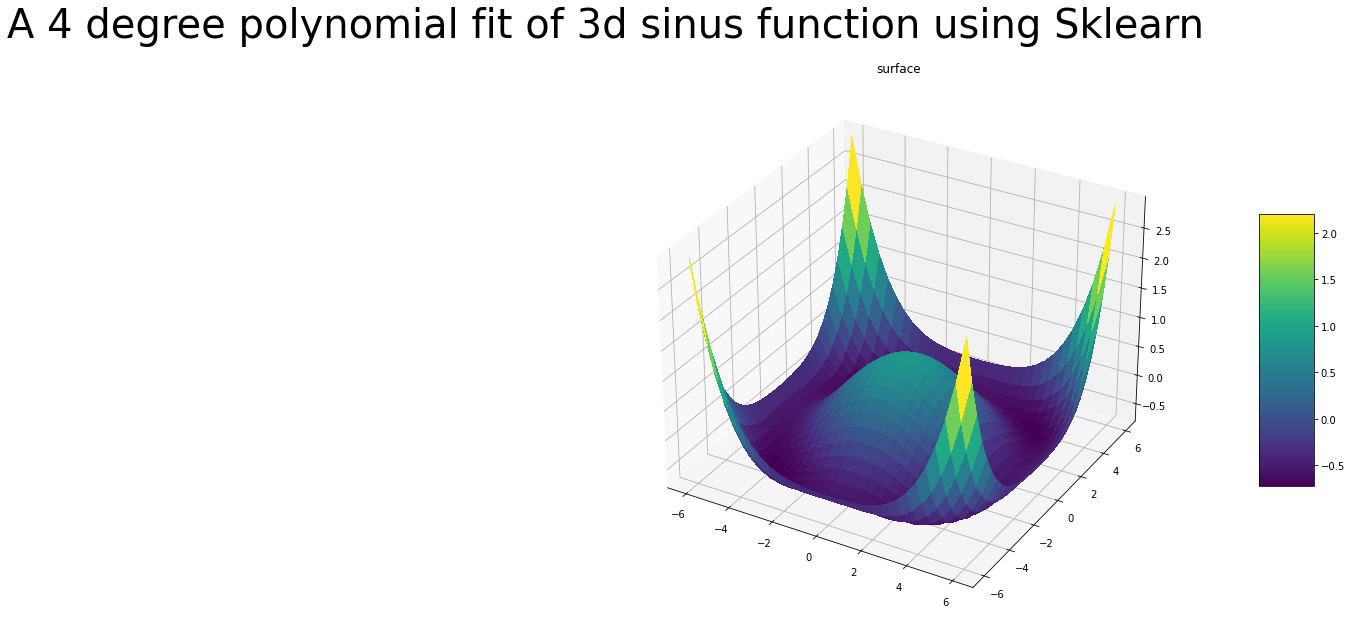

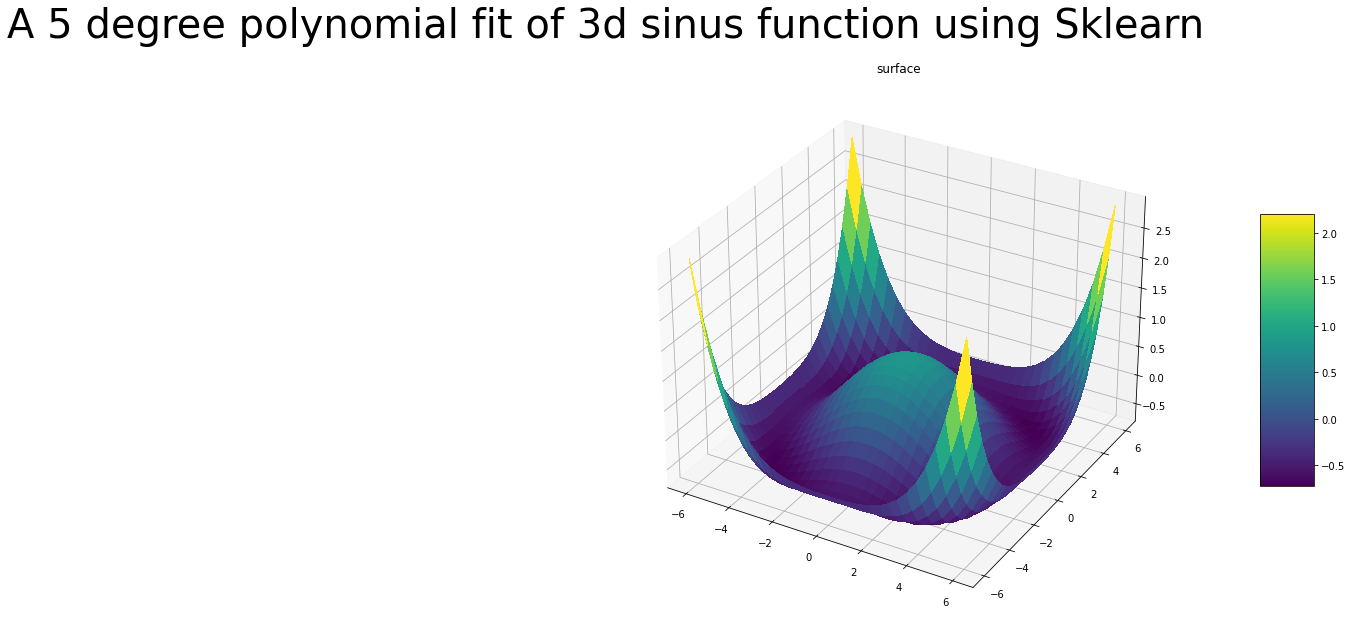

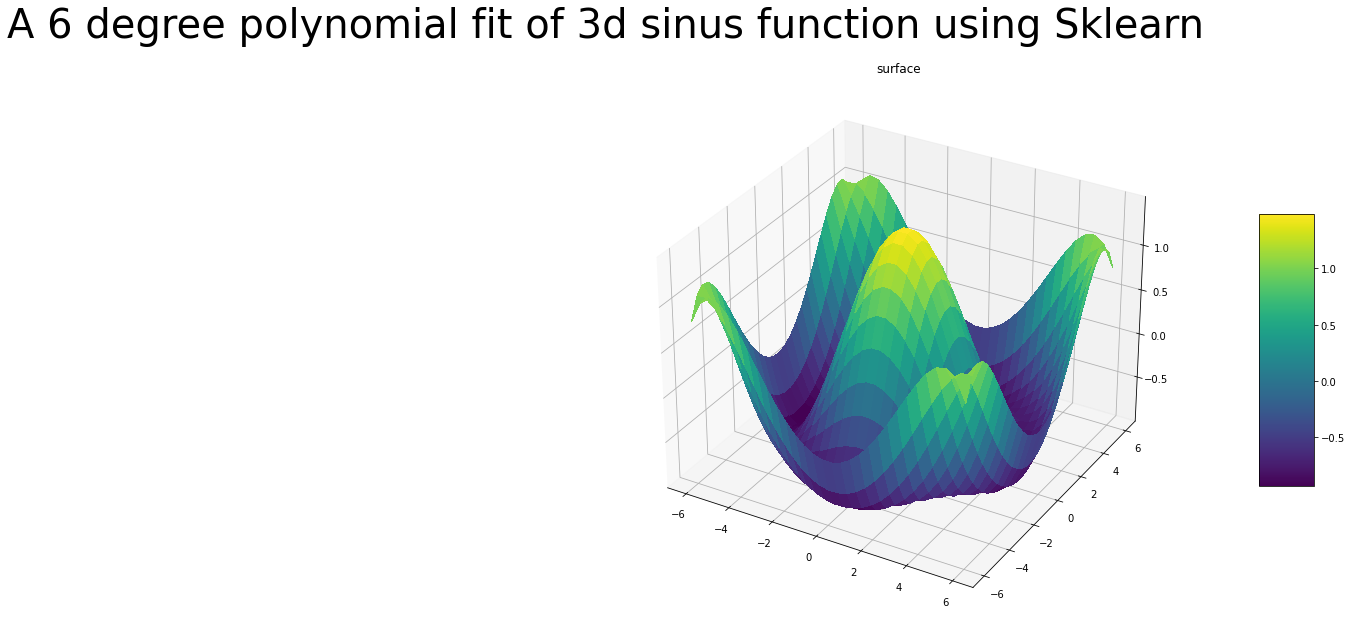

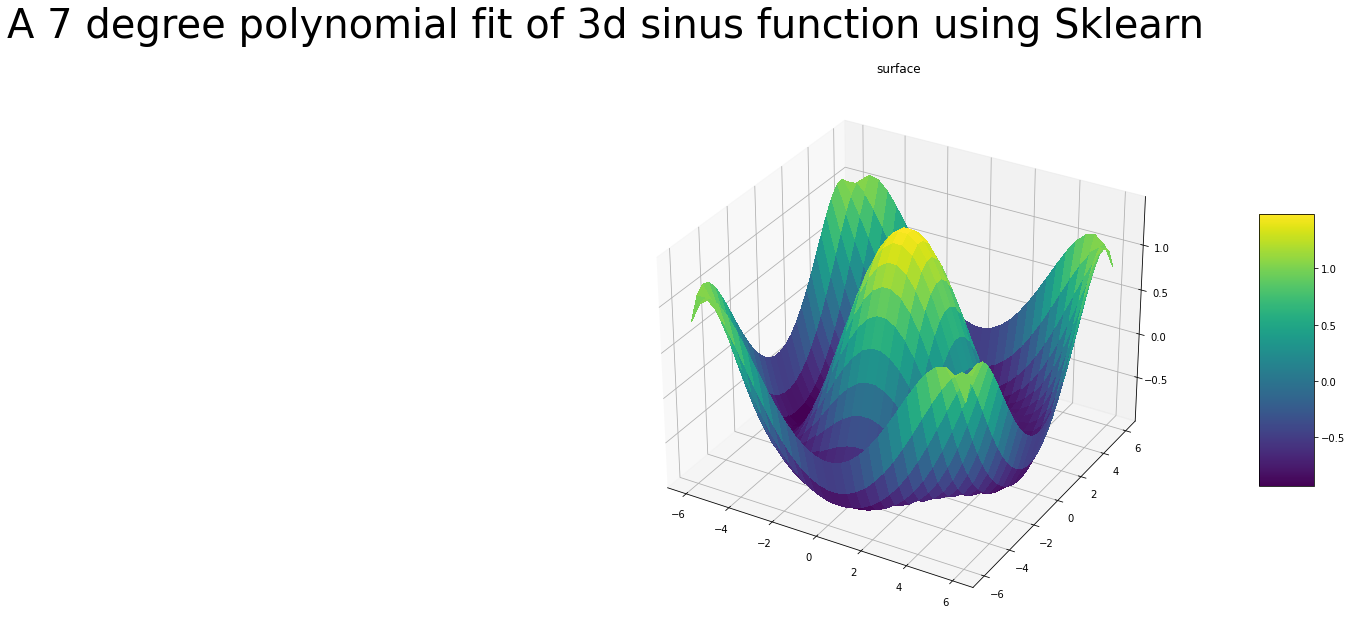

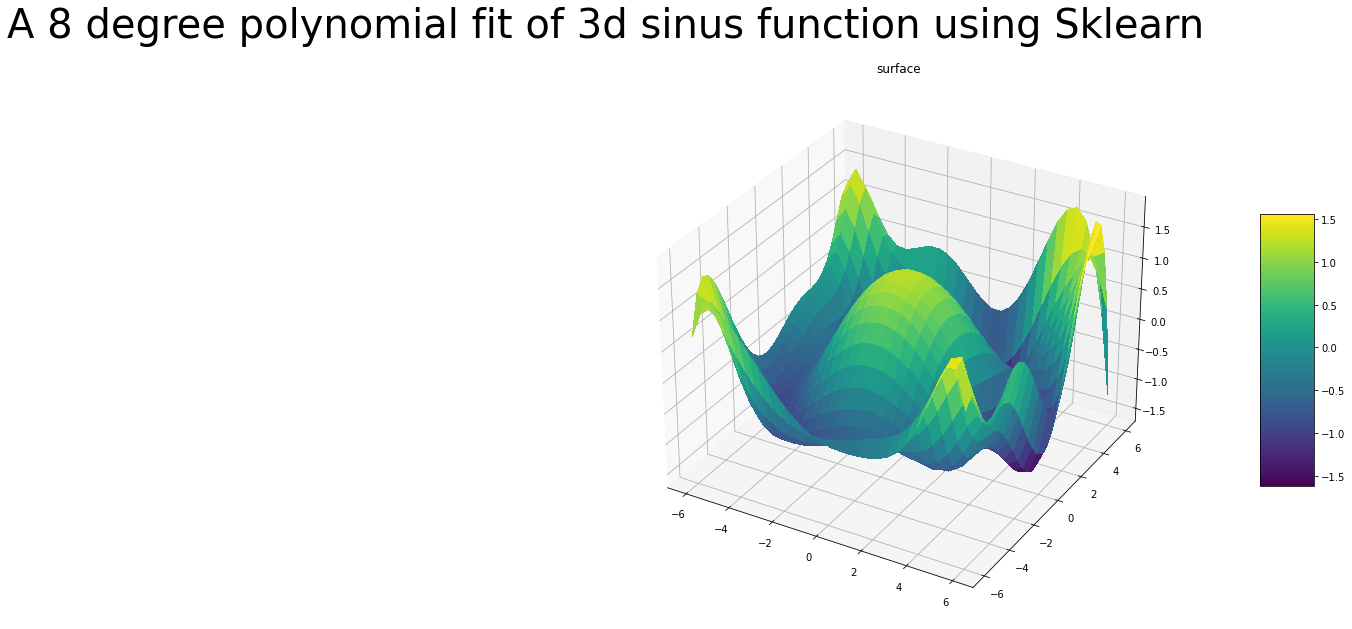

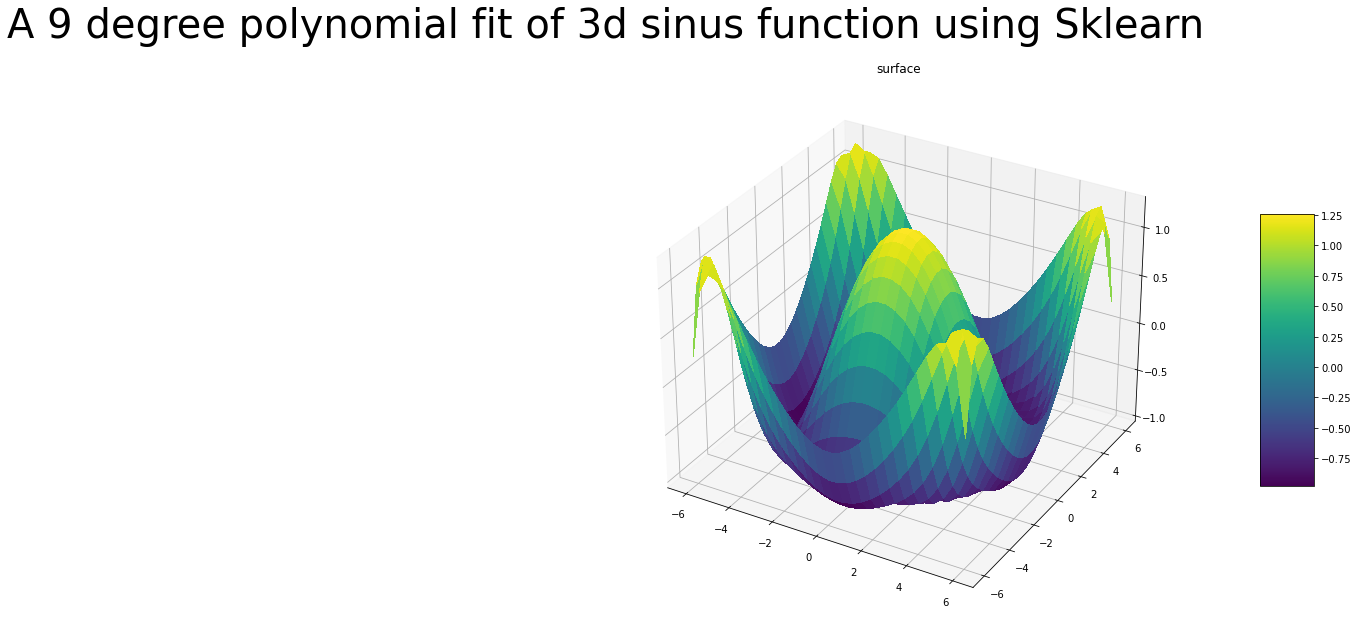

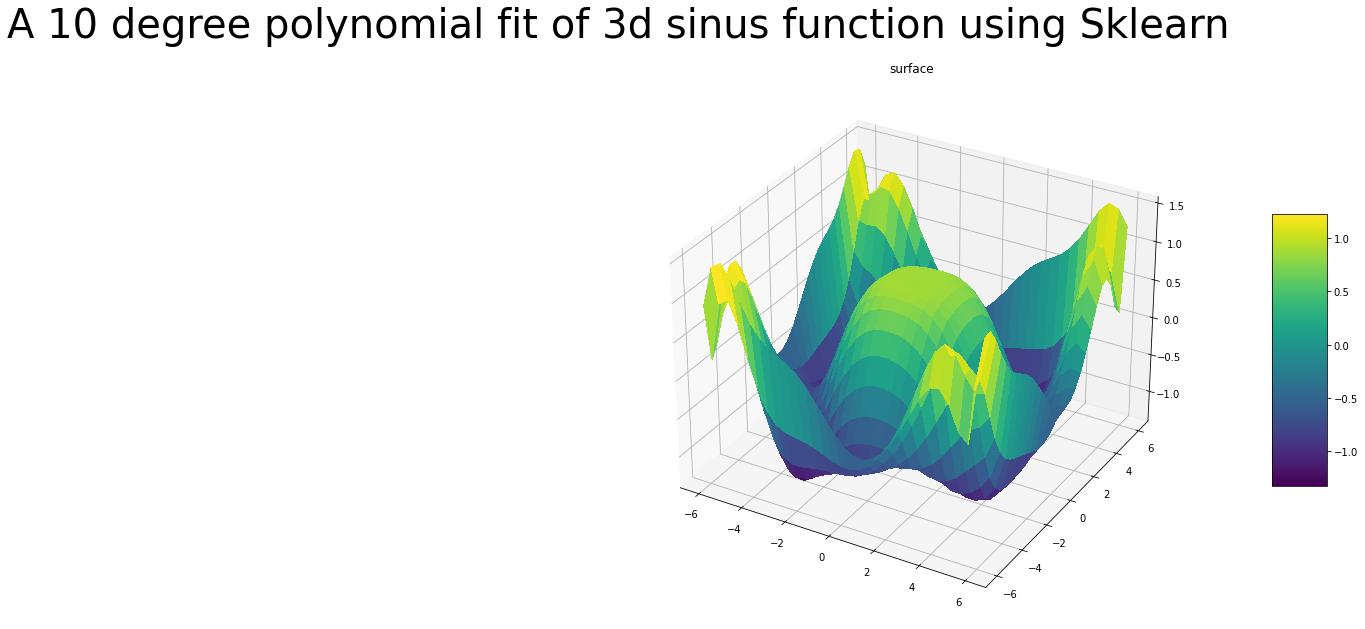

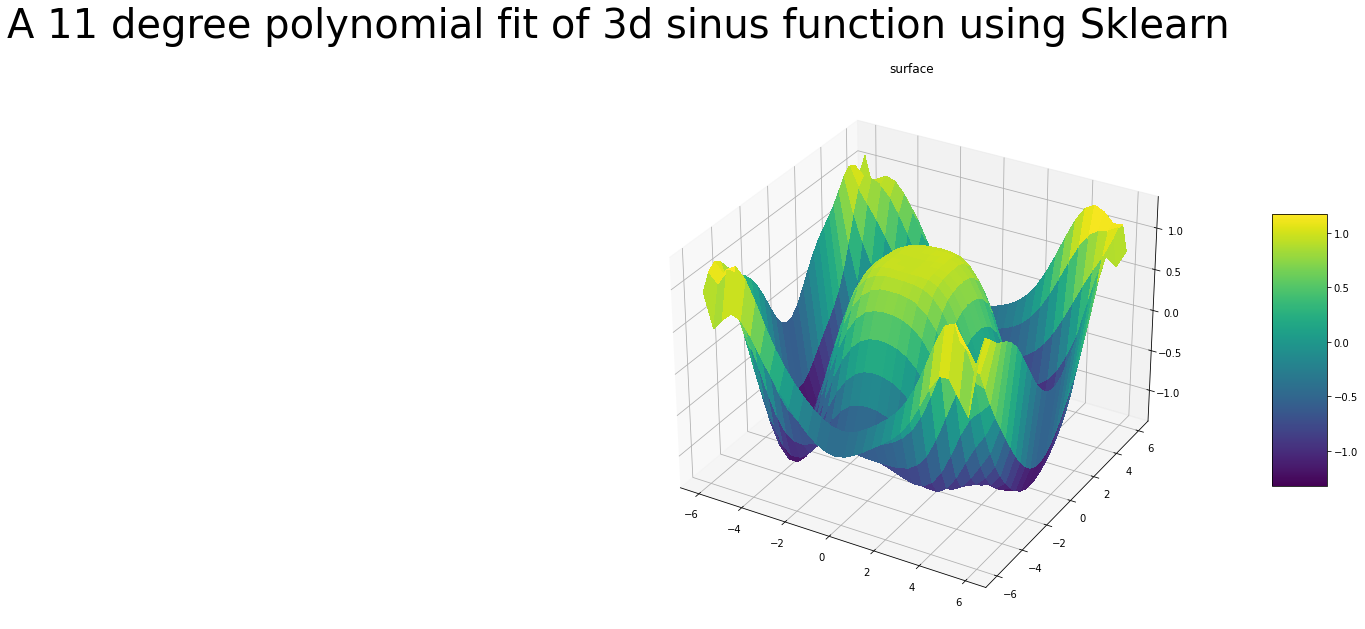

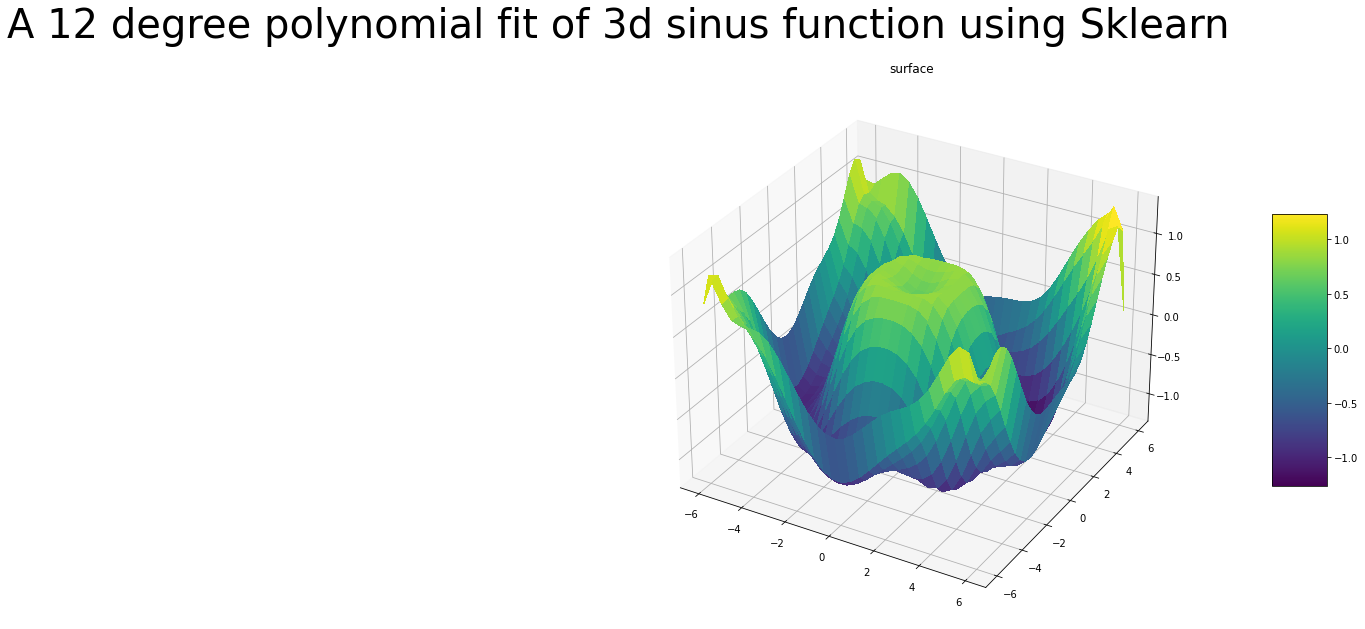

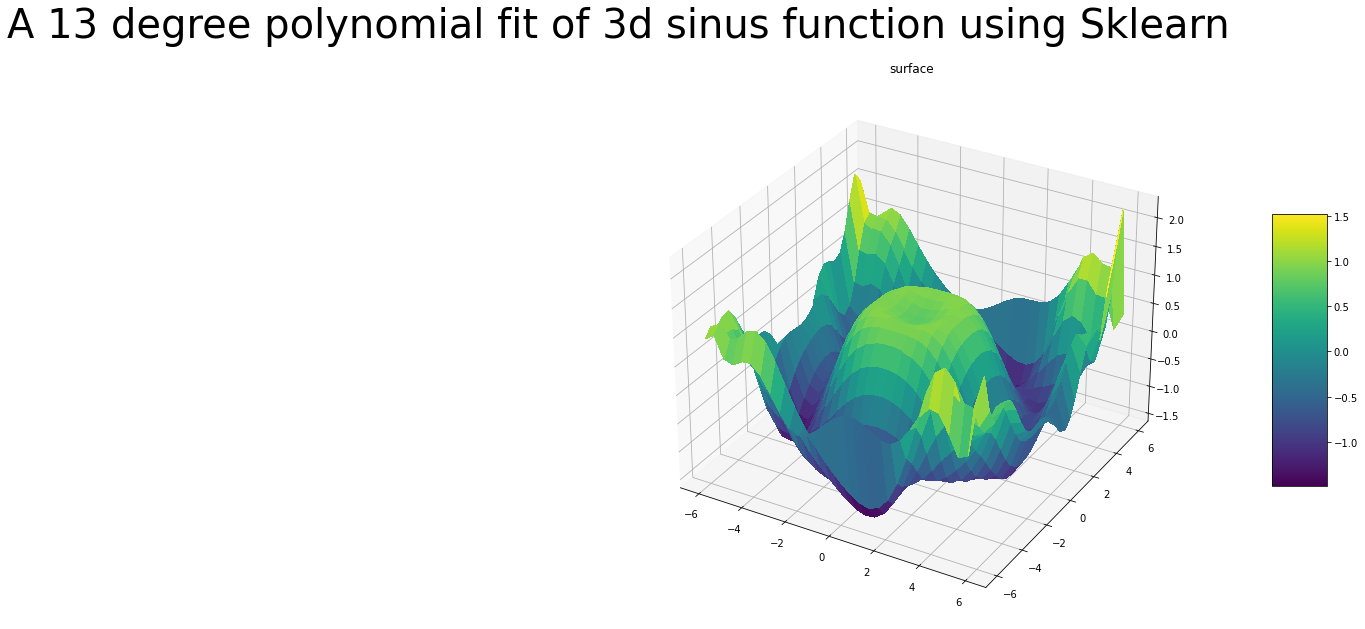

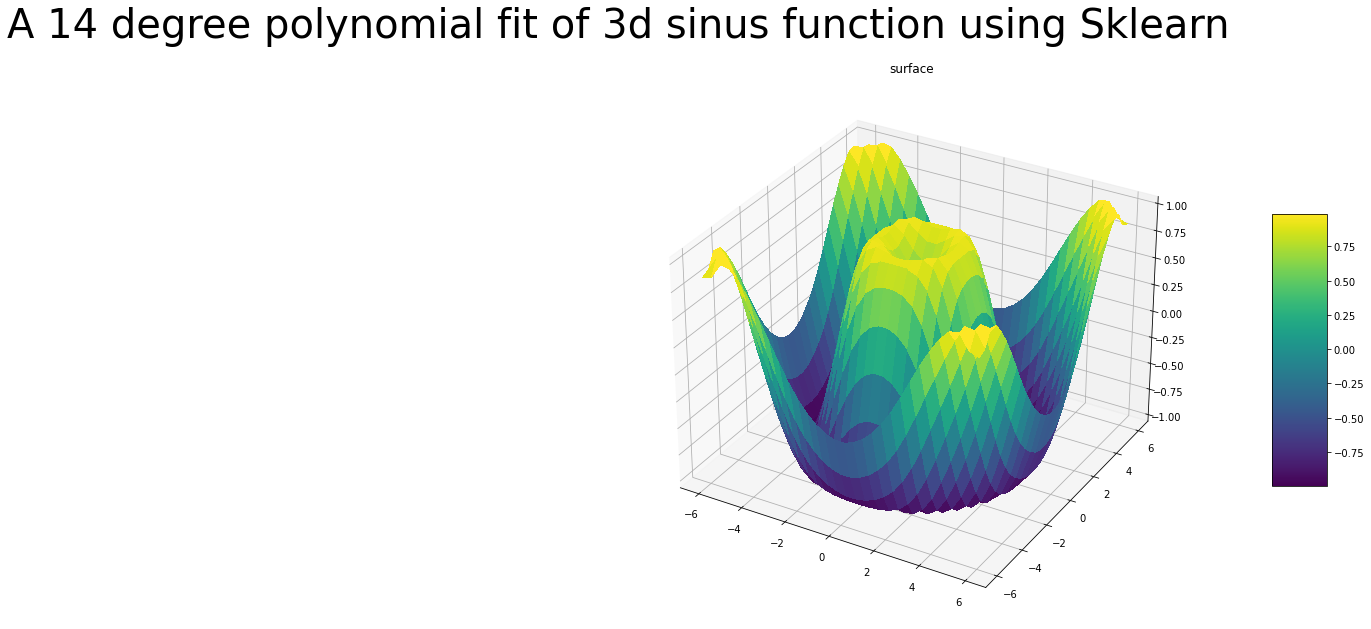

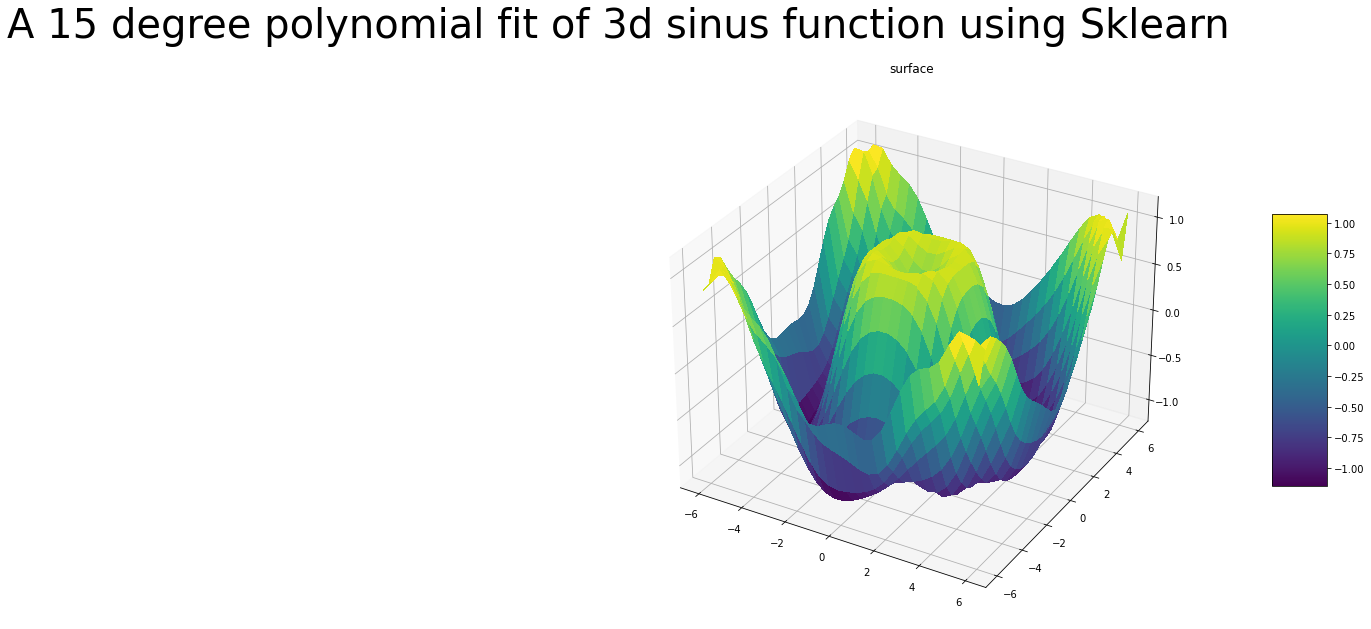

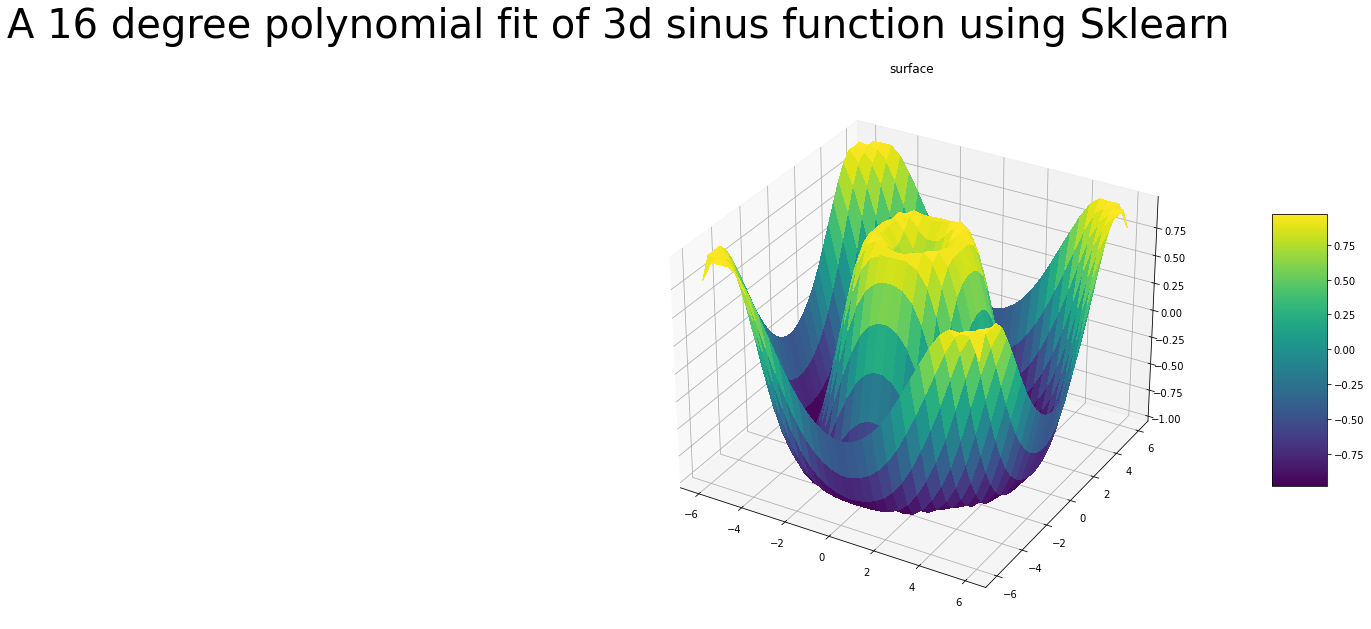

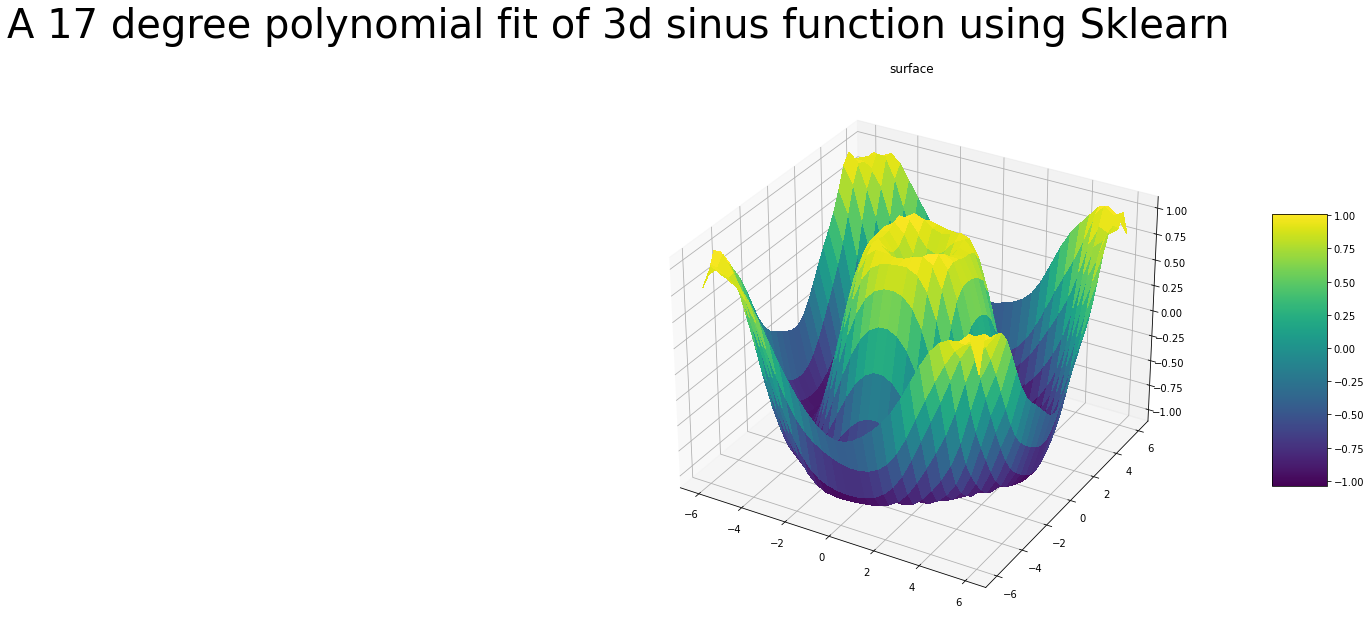

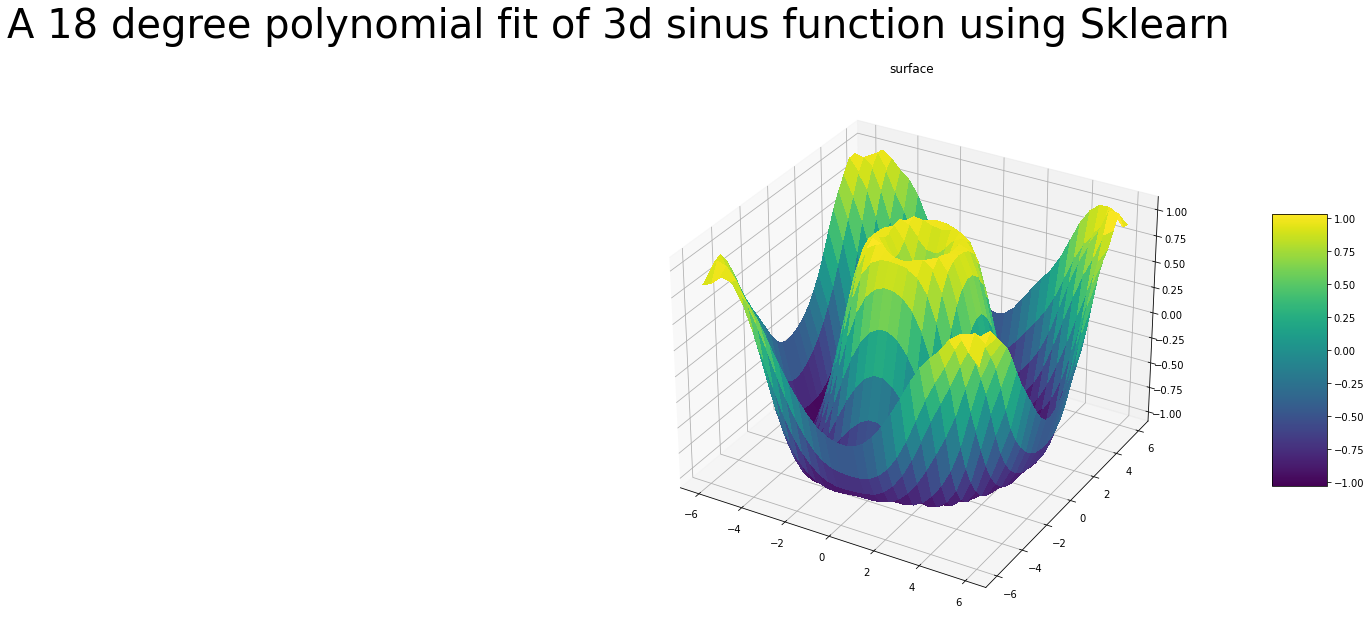

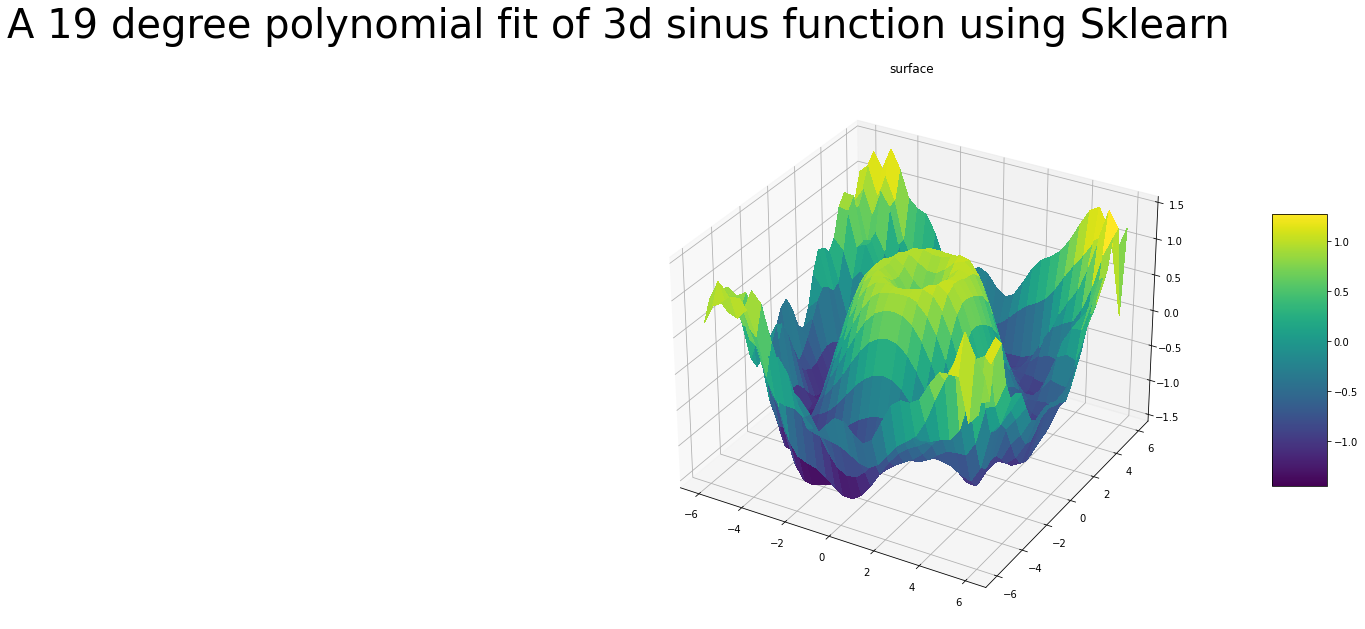

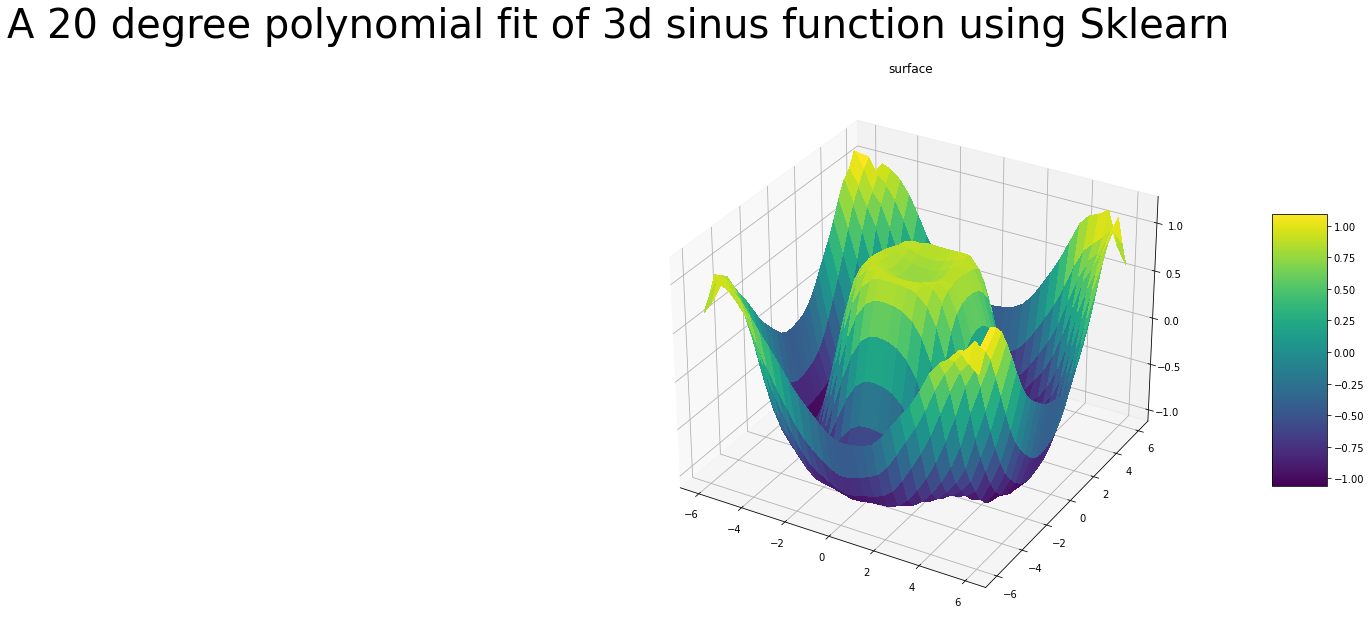

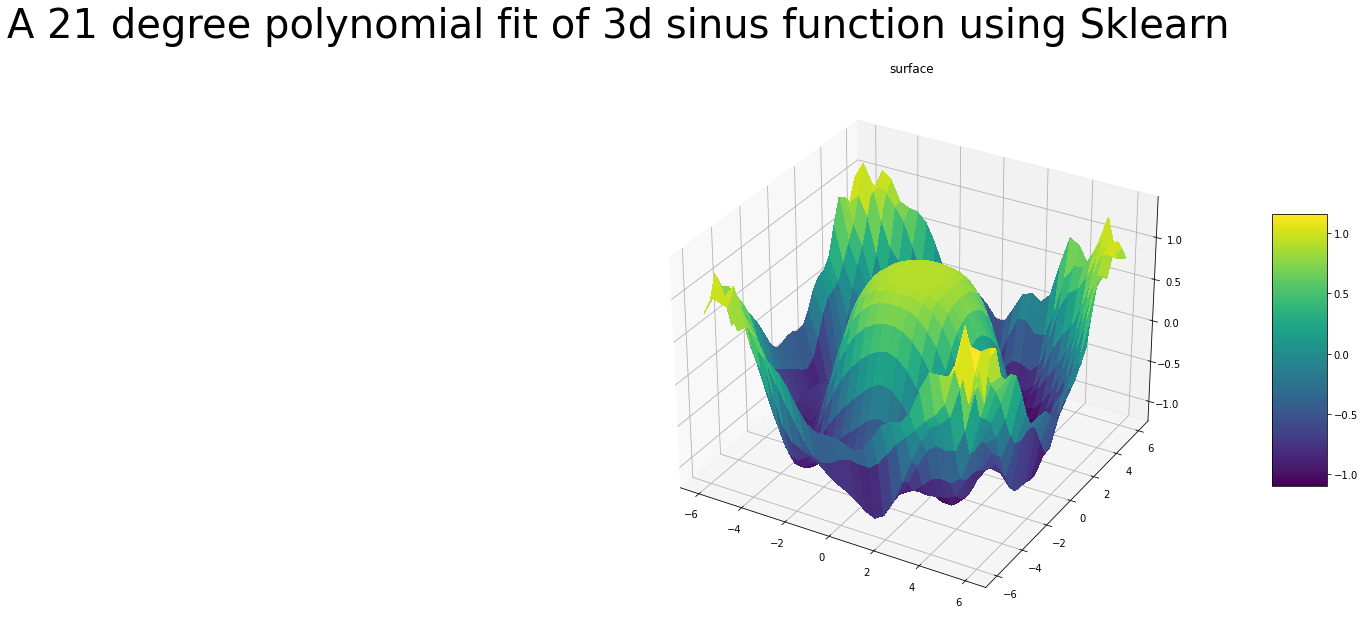

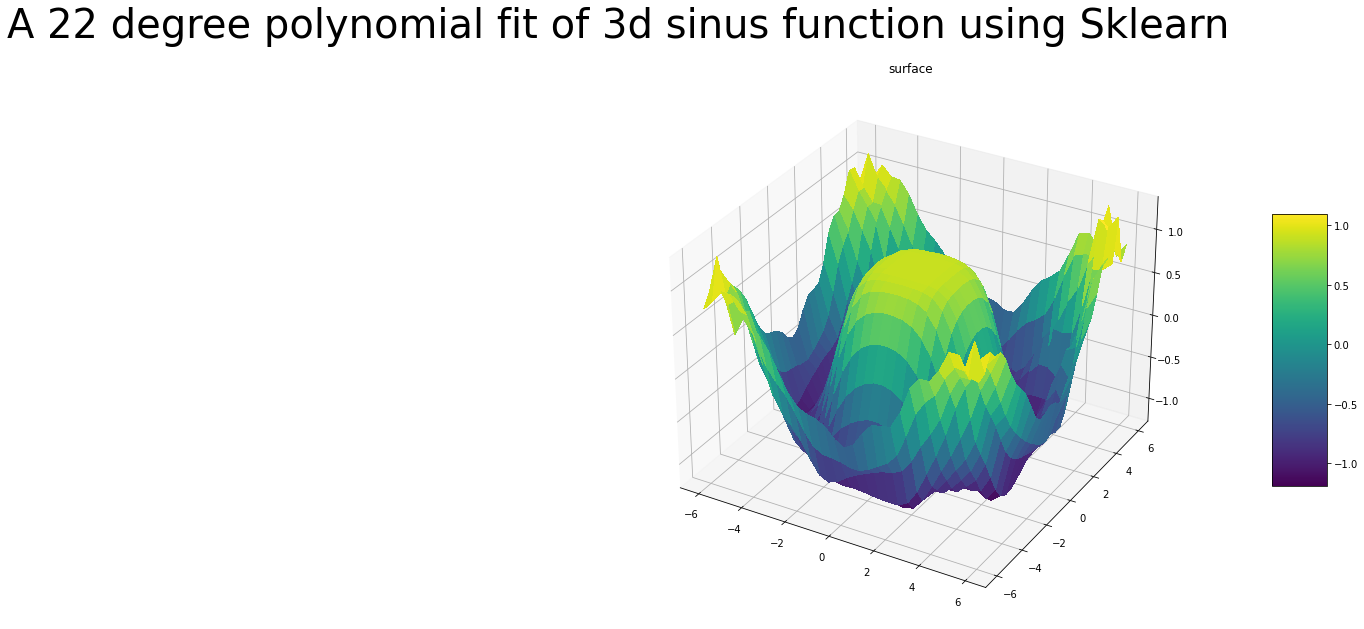

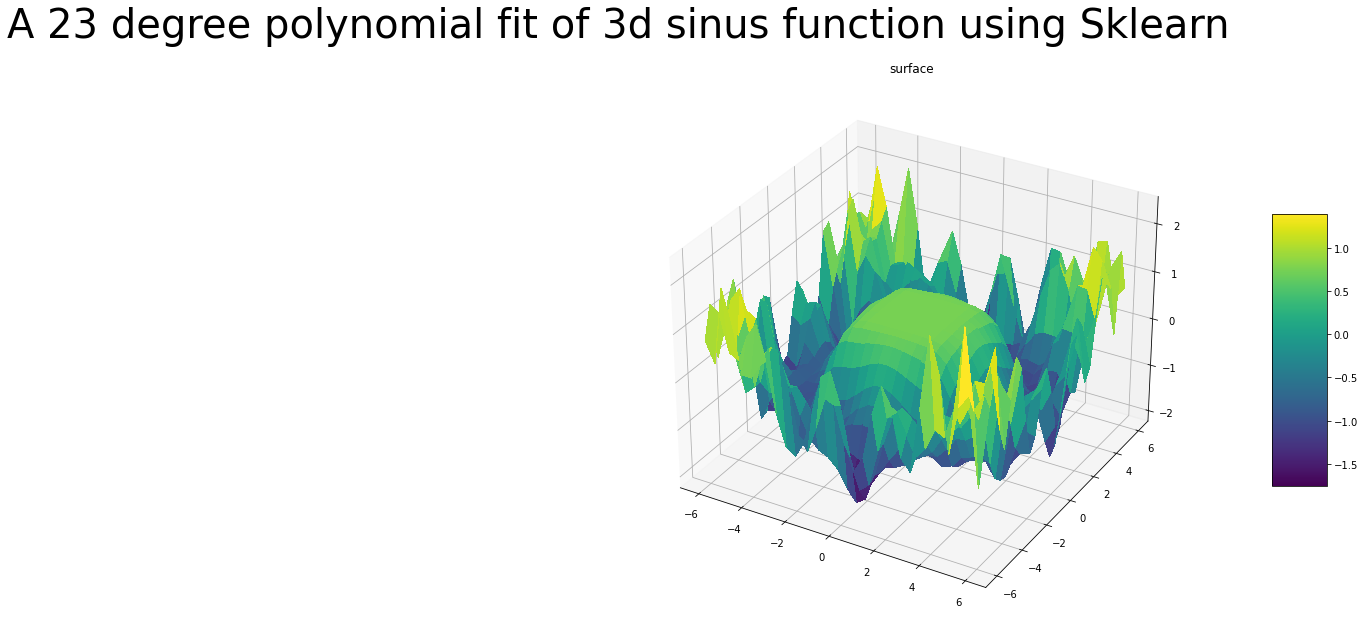

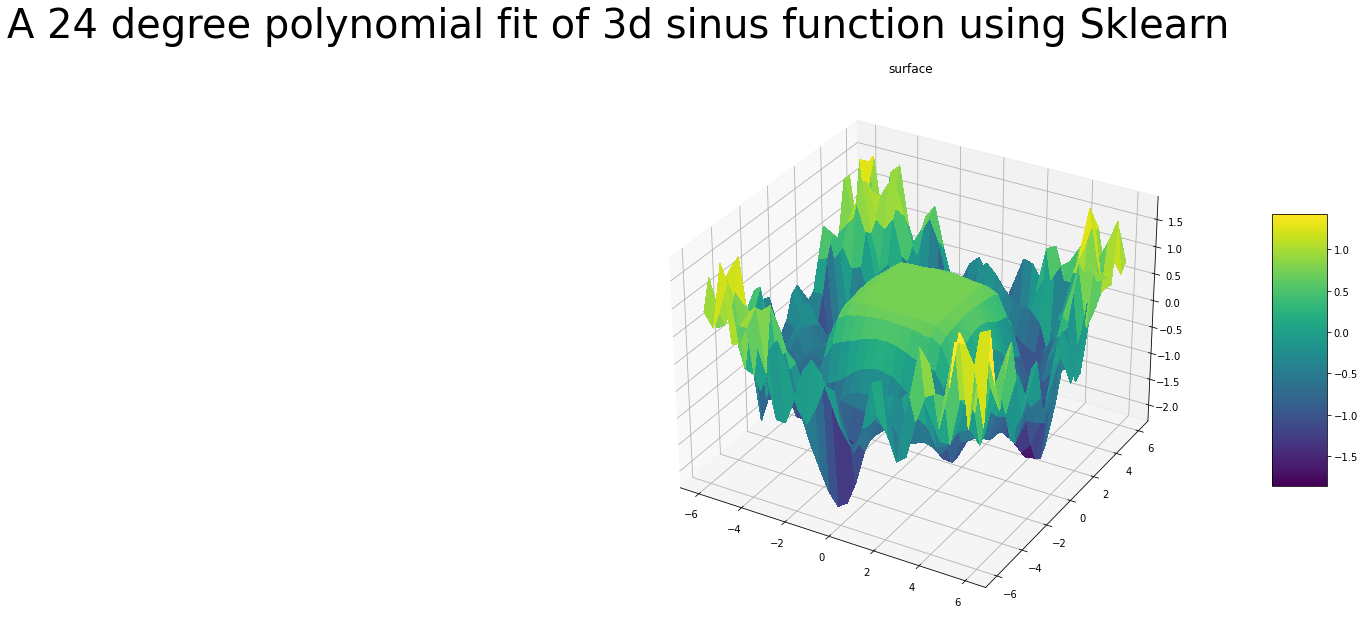

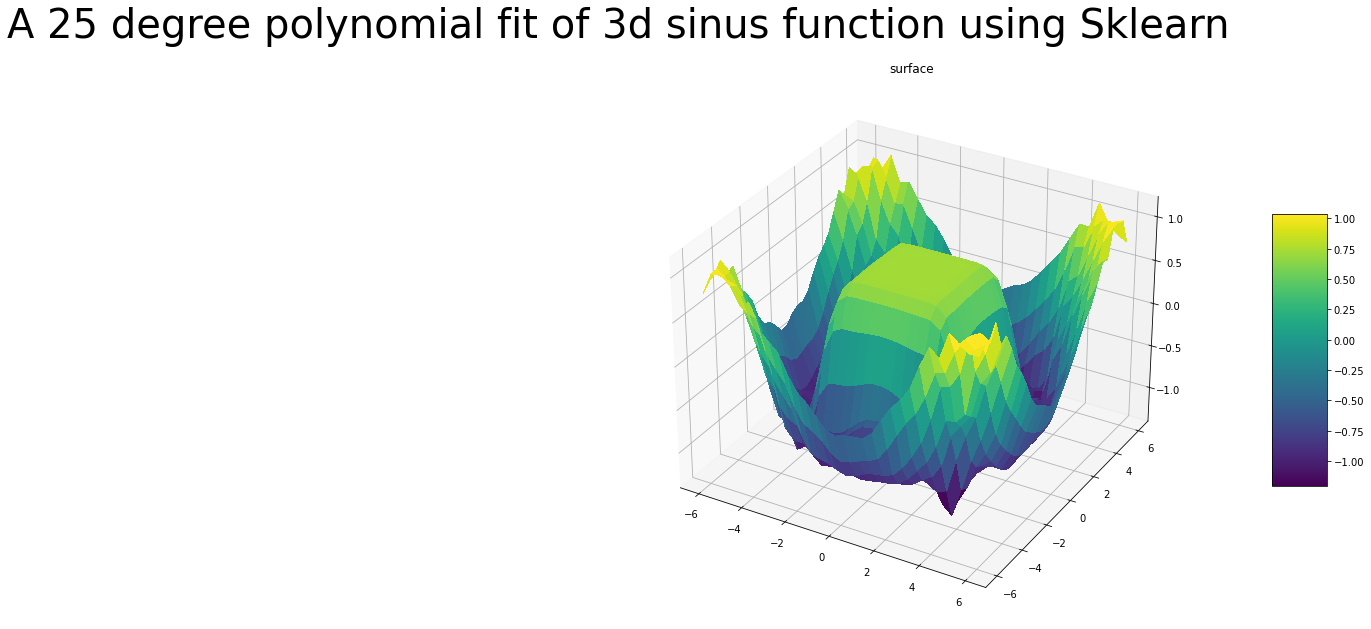

In [5]:
# Polynomial fit
polynomial = 25

# Stacking x and y 
X = np.moveaxis(np.vstack((x_mesh.ravel(), y_mesh.ravel())),0,-1)

for poly in range(polynomial):
    

    polyreg=make_pipeline(PolynomialFeatures(poly+1),LinearRegression())
    polyreg.fit(X,np.expand_dims(z.flatten(),-1))

    z_hat = polyreg.predict(X)

    z_hat_plot = z_hat.reshape(int(math.sqrt(z_hat.shape[0])),int(math.sqrt(z_hat.shape[0])))
    
    
    fig = plt.figure(figsize=(32,10))
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(x_mesh, y_mesh, z_hat_plot, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none',antialiased=False)
    ax.set_title('surface')
    fig.colorbar(surf,shrink=0.5, aspect=5)
    fig.suptitle("A {} degree polynomial fit of 3d sinus function using Sklearn".format(poly+1) ,fontsize="40", color = "black")